In [ ]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange,  CubicSpline
from scipy.optimize import newton
import sympy as sp
from sympy.utilities.lambdify import lambdify
from sympy import diff, symbols, Symbol
sp.init_printing()
import math as mt
from math import factorial
import pandas as pd
import urllib.request

# Actividad 04: Interpolación

---
### Profesor: Juan Marcos Marín
### Nombre: Soleil Dayana Niño Murcia 1033097666
*Métodos computacionales 2024-II*

---

# 1a
Supongamos que queremos interpolar la función  $f(x)=\sin(x)$  usando los puntos  $x_0=0$ ,  $x_1=\pi/2$ , y  $x_2=\pi$.

Encuentre el polinomio de interpolación de Lagrange y el error asociado al misma. Recuerde que el error de interpolación de Lagrange puede expresarse explícitamente como:

\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation},
Donde:
- $f^{(n+1)}(\xi)$ es la derivada de orden $n$ de la función $f(x)$ evaluada en algún punto $\xi$ en el intervalo de interpolación.



In [3]:
x = np.array([0, np.pi/2, np.pi])
fx = lambda x: np.sin(x)

p_lagrange = lagrange(x, fx(x))

In [4]:
x_inter = np.linspace(min(x), max(x))

Text(0.5, 0, '$x$')

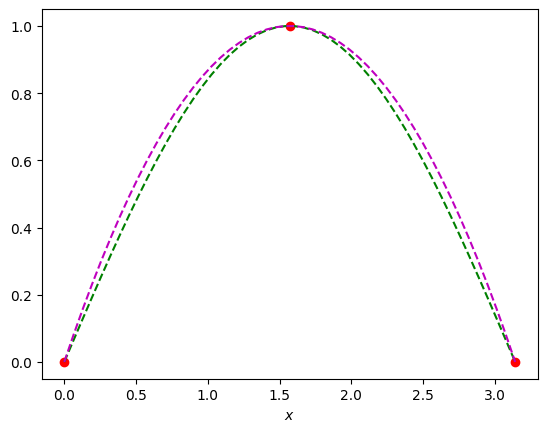

In [5]:
plt.plot(x, fx(x), 'ro', label = 'Puntos')
plt.plot(x_inter, fx(x_inter), 'g--', label = 'sin(x)')
plt.plot(x_inter, p_lagrange(x_inter), 'm--', label = 'Polinomio de Lagrange')

plt.xlabel('$x$')

In [6]:
error = fx(x_inter) - p_lagrange(x_inter)

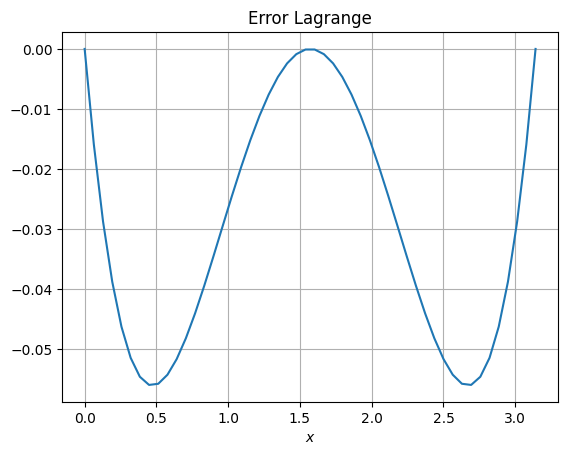

In [7]:
plt.plot(x_inter, error)
plt.title('Error Lagrange')
plt.xlabel('$x$')
plt.grid()

In [8]:
def Error_Lagrange(x_, f):
  '''
  (inputs)
  f : Función simbólica de Sympy
  x : Array con datos a interpolar

  (output)
  return:
  error: Error de la función de Lagrange
  '''
  n = len(x_)
  df = sp.diff(f, x, n)
  df = sp.lambdify(x, df)

  x_inter = np.linspace(min(x_), max(x_), 100)
  error = np.zeros(len(x_inter))
  for j in range(len(x_inter)):
    pdcto = 1
    for k in range(n):
      pdcto *= (x_inter[j] - x_[k])
    error[j] = 1/factorial(n+1)*df(x_inter[j])*pdcto
  return error

In [9]:
x = sp.Symbol('x')
f = sp.sin(x)

In [10]:
x_ = np.array([0, np.pi/2, np.pi])
P1 = lagrange(x_, fx(x_))
Error1 = Error_Lagrange(x_, f)

x_interpolate =  np.linspace(min(x_), max(x_), 100)

error = fx(x_interpolate) - P1(x_interpolate)

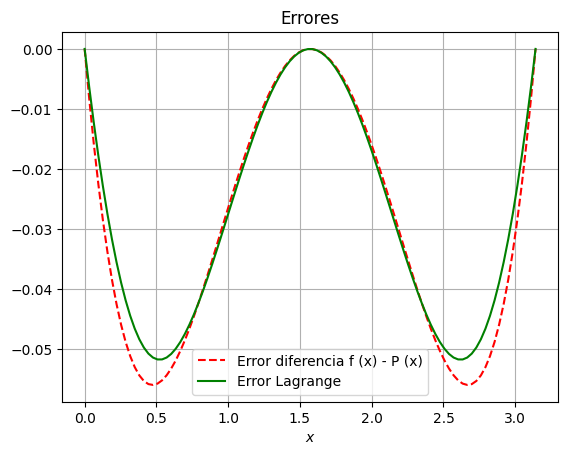

In [11]:
plt.plot(x_interpolate, error, 'r--', label = 'Error diferencia f (x) - P (x)' )
plt.plot(x_interpolate, Error1, 'g-', label = 'Error Lagrange')
plt.title('Errores')
plt.xlabel('$x$')
plt.legend()
plt.grid()
plt.show()

## 1b
Repita el numeral anterior, pero para los polinomios de interpolación de Hermite, conociendo que:


$$
f(x) - P(x) = \epsilon = \frac{f^{(2n+2)}(\xi)}{(2n+2)!} \prod_{i=0}^{n} (x - x_i)^2
$$

In [ ]:
from scipy.interpolate import CubicHermiteSpline

In [ ]:
x_ = np.array([0, np.pi/2, np.pi])
fL = sp.lambdify(x ,f)
df = sp.diff(f, x)
dfL = sp.lambdify(x, df)

In [ ]:
PH = CubicHermiteSpline(x_, fL(x_), dfL(x_)) # Calcula los polinomios de interpolación de Hermite

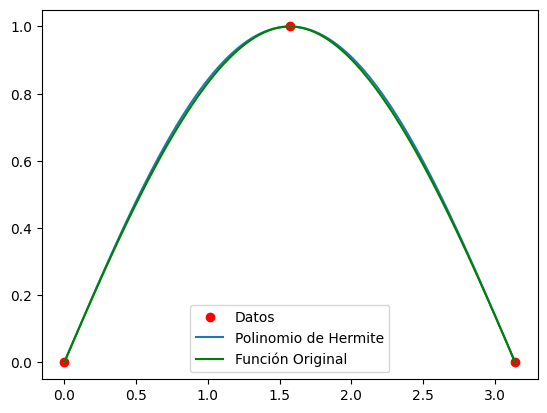

In [ ]:
x_inter = np.linspace(min(x_), max(x_), 100)

plt.plot(x_, fL(x_), 'ro',  label = 'Datos')
plt.plot(x_inter, fL(x_inter), label = 'Polinomio de Hermite')
plt.plot(x_inter, PH(x_inter), 'g-', label = 'Función Original')
plt.legend()
plt.show()

In [ ]:
def Error_Hermite(x_, f):
  '''
  f : Función Sympy con argumento 'x'
  '''
  n = len(x_)
  df = sp.diff(f, x, 2*n +2)
  df = sp.lambdify(x, df)
  x_interpol = np.linspace(min(x_), max(x_), 100)
  error = np.zeros(len(x_interpol))
  for j in range(len(x_interpol)):
    pdcto = 1
    for i in range (n):
      pdcto *= (x_interpol[j] - x_[i])**2
    error[j] = 1/factorial(2*n +2) * df(x_interpol[j])* pdcto

  return error, x_interpol

In [ ]:
ErrorHermite, x_int = Error_Hermite(x_, f)

In [ ]:
ErrorNormal = fL(x_int) - PH(x_int)

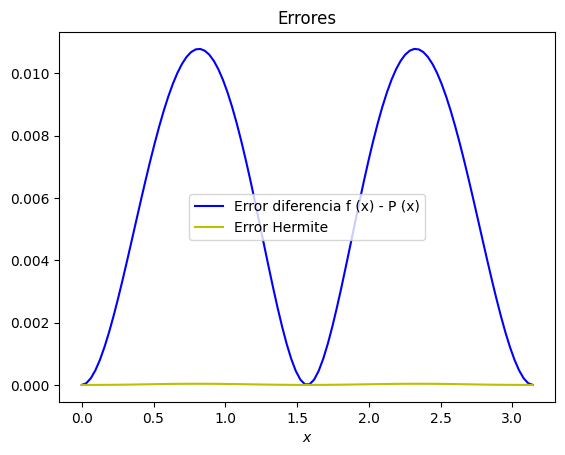

In [ ]:
plt.plot(x_int, ErrorNormal, 'b', label = 'Error diferencia f (x) - P (x)')
plt.plot(x_int, ErrorHermite, 'y', label = 'Error Hermite')
plt.title('Errores')
plt.xlabel('$x$')
plt.legend()
plt.show()

# 2

En física nuclear se calcula la sección eficaz de dispersión (scattering cross section) a partir de experimentos de colisiones, se sabe a partir de la teoría que la sección eficaz se describe por la formula de Breit-Wigner,

$$\sigma(E)=\frac{\sigma_0}{(E-E_r)^2+\frac{\Gamma^2}{4}}$$

donde $E$ es la energía y $E_r,\sigma_0, \Gamma$ son parámetros a ajustar; el valor predicho es $(E_r,\Gamma) = (78, 55)$ MeV; donde $\sigma_0$ se puede calcular ahora a partir de la fórmula simplemente remplazando cualquier par de puntos de la tabla.

A partir de los valores de energía,


```
Energia  = np.array([0   , 25  , 50  , 75  , 100 , 125 , 150 , 175 , 200])
sigma_exp= np.array([10.6, 16.0, 45.0, 83.5, 52.8, 19.9, 10.8, 8.25, 4.7])
```

* Calcule los polinomios de Lagrange, Newton y Hermite.

* Haga un gráfico de los polinomios junto con la función.

* Finalmente, a partir de la diferencia $|f(x) - P_n(x)|$ calcule el error asociado a cada uno de ellos. ¿Cuál será el mejor?

In [61]:
Energia  = np.array([0   , 25  , 50  , 75  , 100 , 125 , 150 , 175 , 200])
sigma_exp= np.array([10.6, 16.0, 45.0, 83.5, 52.8, 19.9, 10.8, 8.25, 4.7])
x_vals = np.linspace(0,200,100)
Er, gamma = 78, 55

s0 = sigma_exp[0]*((E[0]-Er)**2+gamma**2/4) # Pasa a multiplicar para obtener σ0
s0

72506.65

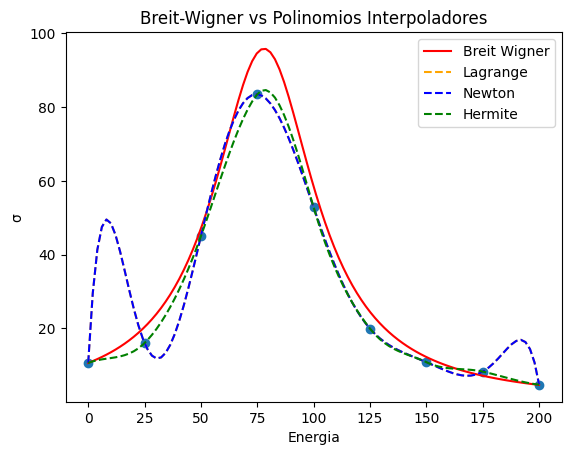

In [73]:
from scipy.interpolate import lagrange, BarycentricInterpolator

f_ = s0/((x-Er)**2+(gamma**2)/4)
f = sp.lambdify(x, f_, 'numpy')
df_ = sp.diff(f_, x)
df = sp.lambdify(x, df_, 'numpy')

LagrangePoly = lagrange(Energia,sigma_exp)
NewtonPoly = BarycentricInterpolator(Energia,sigma_exp)
HermitePoly = CubicHermiteSpline(Energia,sigma_exp,df(Energia))

plt.plot(Energia,sigma_exp,"o")
plt.plot(x_vals, f(x_vals), label="Breit Wigner", color = 'red')
plt.plot(x_vals, LagrangePoly(x_vals), "--", label="Lagrange", color = 'orange' )
plt.plot(x_vals, NewtonPoly(x_vals), "--", label="Newton", color = 'blue')
plt.plot(x_vals, HermitePoly(x_vals), "--", label="Hermite", color = 'g')
plt.title('Breit-Wigner vs Polinomios Interpoladores')
plt.xlabel('Energia')
plt.ylabel('σ')
plt.legend()

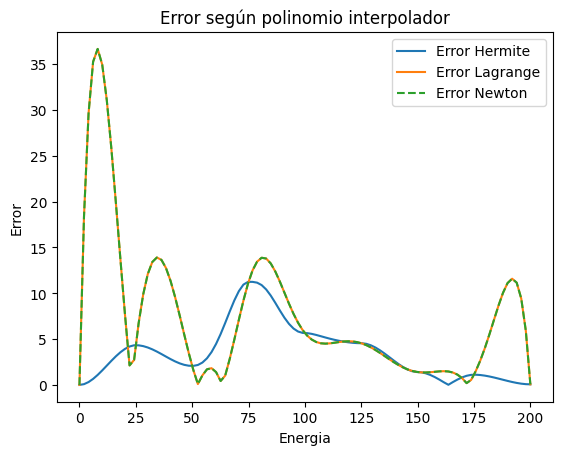

In [84]:
error_lagrange = abs(f(x_vals)-LagrangePoly(x_vals))
error_newton = abs(f(x_vals)-NewtonPoly(x_vals))
error_hermite = abs(f(x_vals)-HermitePoly(x_vals))

plt.plot(x_vals, error_hermite,  label="Error Hermite")
plt.plot(x_vals, error_lagrange, label="Error Lagrange")
plt.plot(x_vals, error_newton, "--", label="Error Newton")
plt.title("Error según polinomio interpolador")
plt.xlabel("Energia")
plt.ylabel("Error")
plt.legend()

Hermite tiene el menor error, por tanto es el más conveniente.

#3
Consideremos la función:
\begin{equation*}
     f(x) = \frac{1}{1+25x^2}
\end{equation*}
en el intervalo $[-1, 1]$, definamos un conjunto de puntos $n+1$  equiespaciados en $[-1,1]$.

* Representar gráficamente la función junto al polinomio de interpolación de Lagrange, $p_n(x)$, para $n=\{ 4, 8, 12, 16, 20 \}$.
* Comprobar gráficamente cómo el error aumenta con $n$. Emplee la libreria, simbolica de `sympy` y encuente el error en la interpolación. La cota del  error , viene dado por:
\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation},

emplee la libreria simbólica para realizar la estimación de dicha cota, sólo para $n = 4$, en el punto $x=0.5$.

* Repita la parte inicial para el conjunto de $p_n(x)$ con $n=\{ 4, 8, 12, 16, 20 \}$, usando la interpolación de Hermite, ¿existe alguna diferencia?

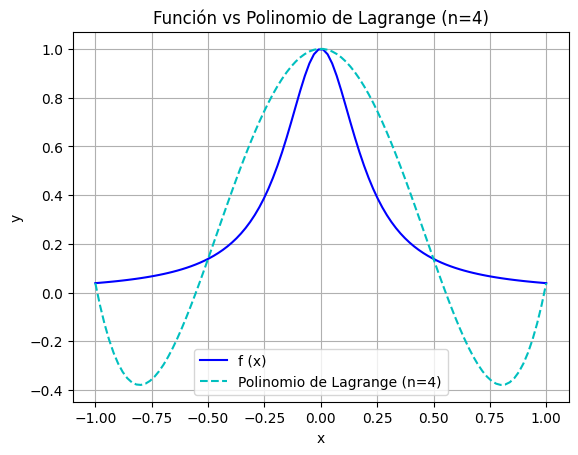

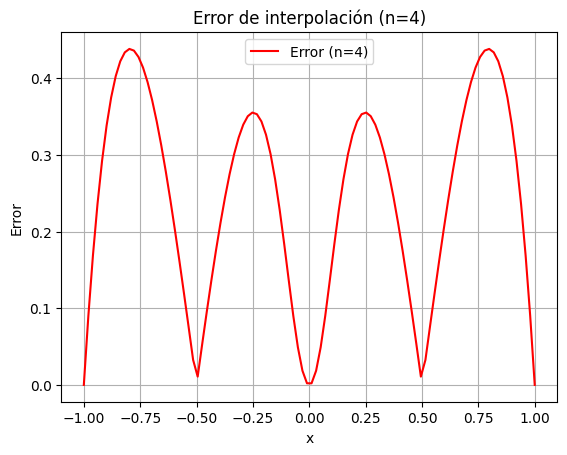

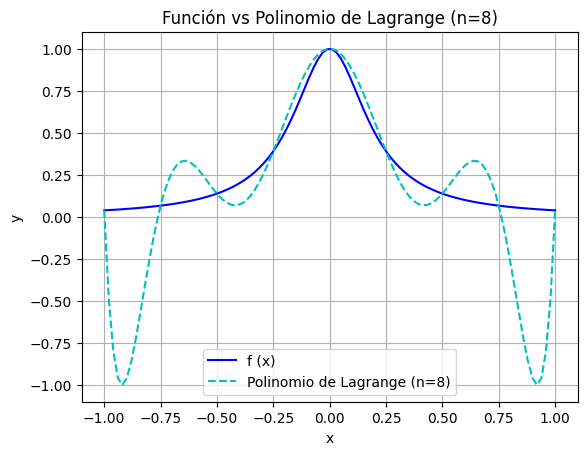

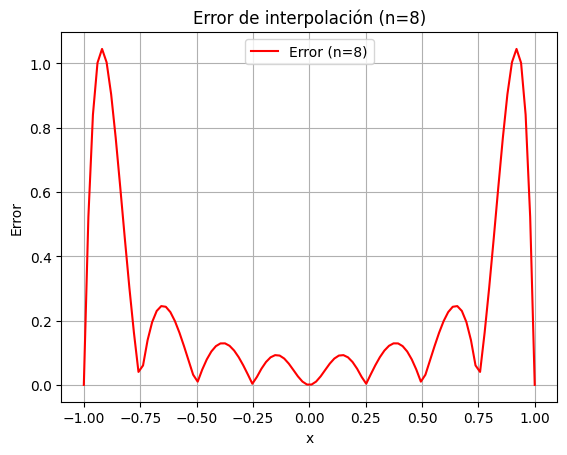

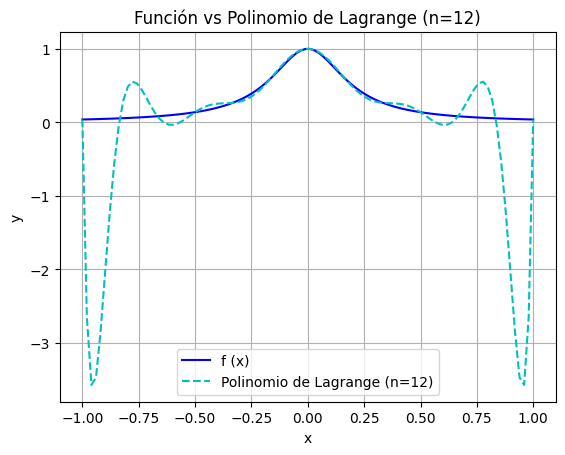

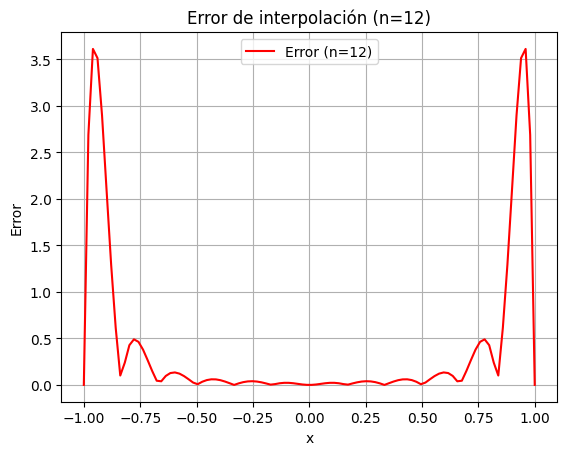

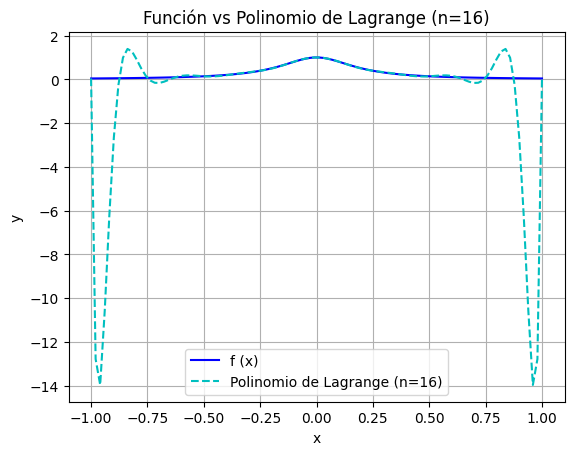

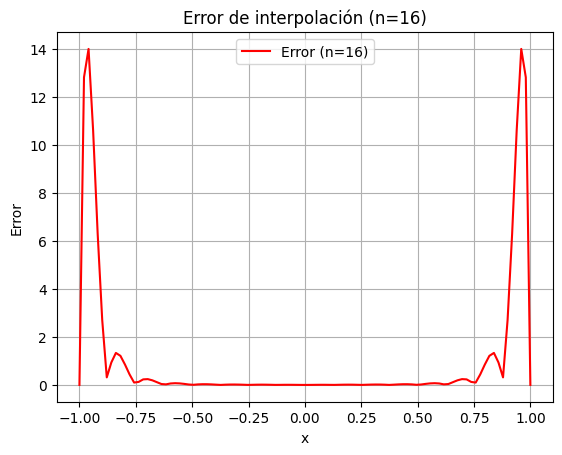

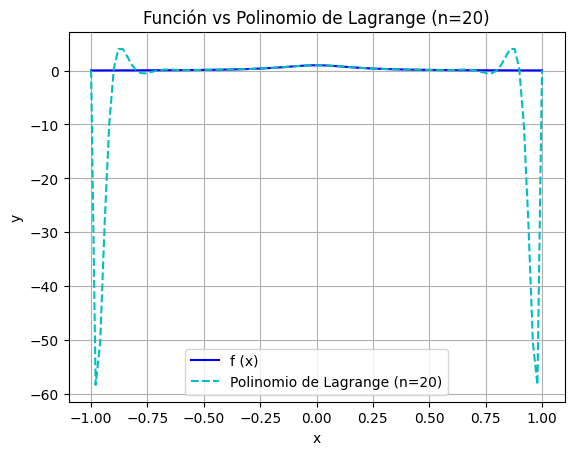

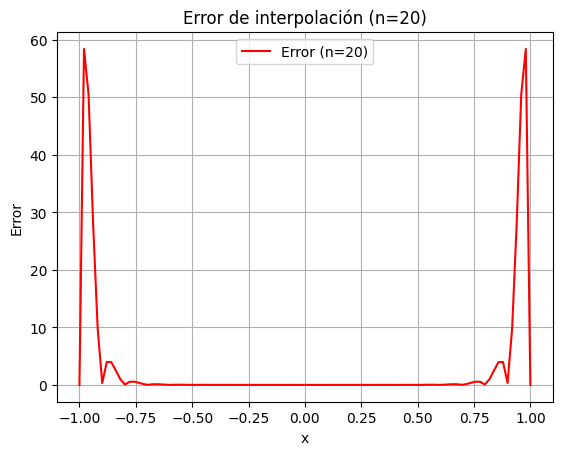

In [12]:
from scipy.interpolate import lagrange

f = lambda x: 1/(1+(25*(x**2)))
x = np.linspace(-1, 1, 100)

# Polinomio de Lagrange
for n in [4, 8, 12, 16, 20]:
  x_ = np.linspace(-1, 1, n+1)
  p_lagrange = lagrange(x_, f(x_))
  plt.figure()
  plt.plot(x, f(x), label='f (x)', color= 'blue')
  plt.plot(x, p_lagrange(x), '--c', label='Polinomio de Lagrange (n={})'.format(n))
  plt.xlabel('x')
  plt.ylabel('y')
  plt.title('Función vs Polinomio de Lagrange (n={})'.format(n))
  plt.legend()
  plt.grid(True)

  # Error
  epsilon = abs(f(x) - p_lagrange(x))
  plt.figure()
  plt.plot(x, epsilon, color= 'red', label='Error (n={})'.format(n))
  plt.xlabel('x')
  plt.ylabel('Error')
  plt.title('Error de interpolación (n={})'.format(n))
  plt.legend()
  plt.grid(True)

plt.show()

note que para iteración con n=4 y x= 0.5, el error se acerca bastante a 0.

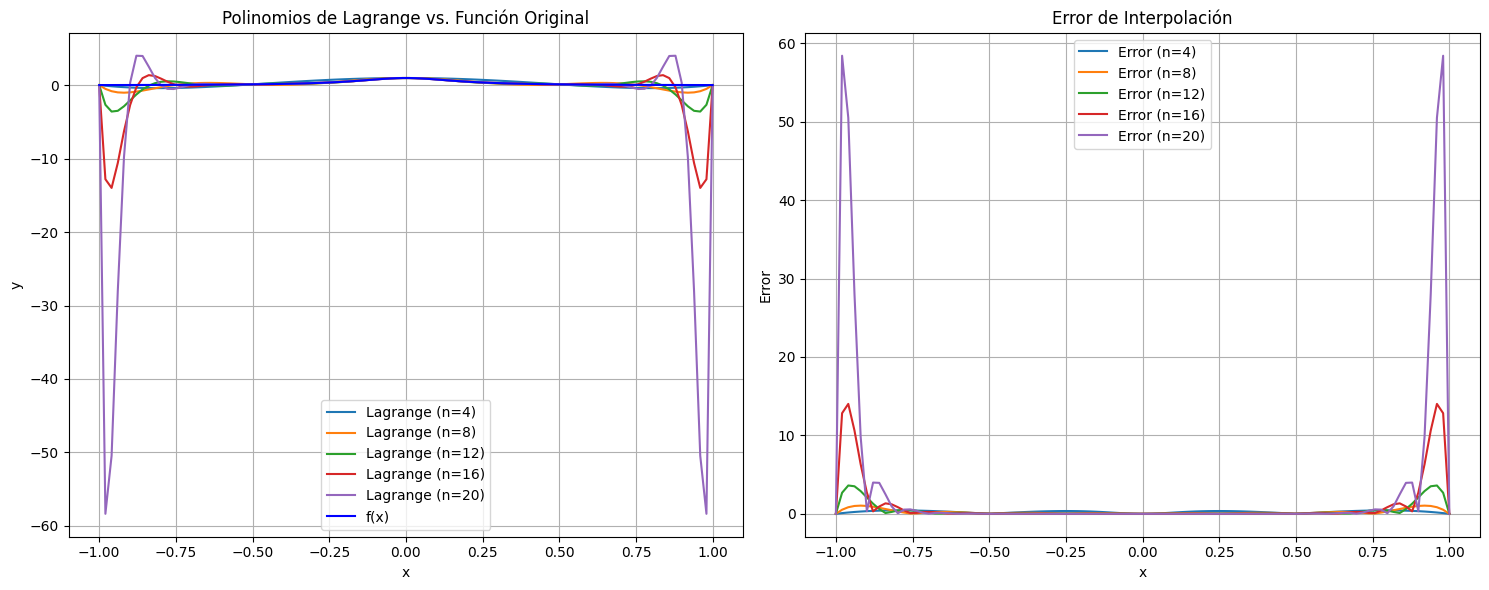

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6)) # Para hacer las dos gráficas

for n in [4, 8, 12, 16, 20]:
    x_ = np.linspace(-1, 1, n + 1)
    p_lagrange = lagrange(x_, f(x_))

    # Polinomios en primer gráfica
    axes[0].plot(x, p_lagrange(x), label=f'Lagrange (n={n})')

    # Calcula el error en la segunda gráfica
    epsilon = abs(f(x) - p_lagrange(x))
    axes[1].plot(x, epsilon, label=f'Error (n={n})')

axes[0].plot(x, f(x), label='f(x)', color='blue') # Pone la función original en ambas gráficas

axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].set_title('Polinomios de Lagrange vs. Función Original')
axes[0].legend()
axes[0].grid(True)

axes[1].set_xlabel('x')
axes[1].set_ylabel('Error')
axes[1].set_title('Error de Interpolación')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

 Al aumentar el número de puntos, el polinomio de Lagrange tiende a oscilar más entre los puntos de interpolación. Note que estas oscilaciones son especialmente pronunciadas *cerca de los extremos del intervalo, donde el error crece considerablemente.*

 Esto demuestra el fenómeno de Runge, visto en clase. Confirmando que un mayor número de puntos de interpolación resulta en un polinomio de mayor grado, lo cual tiende a aumentar las oscilaciones.

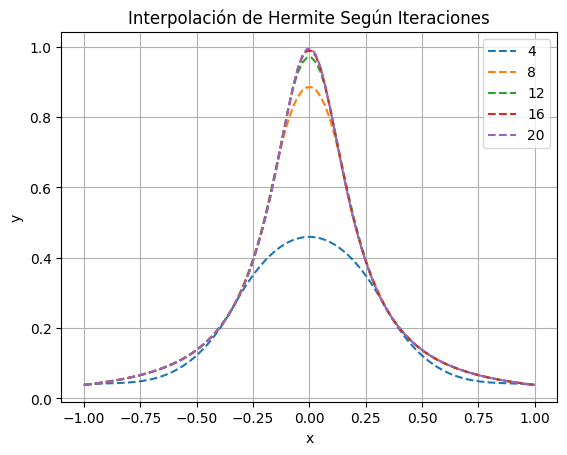

In [18]:
# Repita la parte inicial para el conjunto de
#pn(x)  con  n={4,8,12,16,20} , usando la interpolación de Hermite, ¿existe alguna diferencia?
from scipy.interpolate import CubicHermiteSpline
x = Symbol('x')
f = 1/(1+25*x**2)
f_ = sp.lambdify(x, f, 'numpy')
df = sp.diff(f, x)
df = sp.lambdify(x, df, 'numpy')

x_lins = np.linspace(-1, 1, 100)
for n in [4, 8, 12, 16, 20]:

  x_ = np.linspace(-1, 1, n)
  y = f_(x_)
  pol_hermite = CubicHermiteSpline(x_, y, df(x_))

  plt.plot(x_lins, pol_hermite(x_lins), "--", label= n)
  plt.xlabel('x')
  plt.ylabel('y')
  plt.title('Interpolación de Hermite Según Iteraciones')
  plt.legend()
  plt.grid()

Conforme aumentan las iteraciones, la interpolación por Hermite resulta significativamente más conveniente que la de Lagrange; esto  debido a que al emplear la derivada, se aproxima a los puntos por sus límites, volviéndose más acertada.

# 4

Consideremos la imagen ![paloma](https://github.com/hernansalinas/autogrades/blob/main/Laboratorios_Taller/img/paloma.png?raw=true).

Ref: Metodos numericos, Burden.


Con los datos dados en la tabla:

1. Representar gráficamente la imagen, usando las órdenes `imread` e `imshow` de python (estas órdenes están contenidas en el paquete `matplotlib`)

2. Definir una lista de puntos, $x_i$,$y_i$ del pato.

3. Representar el polinomio de interpolación de Lagrange y de Hermite en estos puntos, para aproximar el dibujo.

4. Repetir el proceso de interpolación mediante *splines* cúbicos. Para ello, utilizar la función `CubicSpline` (contenida en `scipy.interpolate`),


5. Comparar los resultados. ¿Alguna de las interpolaciones presenta oscilaciones? ¿A qué se debe este fenómeno?



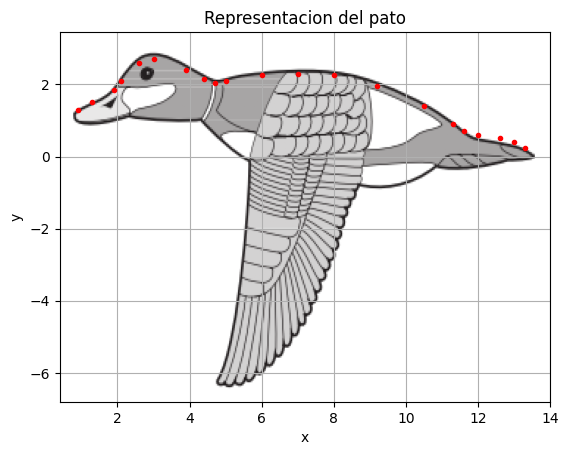

In [ ]:
pato = 'https://3.bp.blogspot.com/-8_LTrCIxVSQ/VxU-5Gq2ffI/AAAAAAAAIto/LhCDEwHKTiAbLr7IhizQwGV13YTwgpbDwCLcB/s400/pato1.png' #URL
urllib.request.urlretrieve(pato, 'pato.jpg')# Descargar la imagen
imagen_pato = plt.imread('pato.jpg') # Variable con la imagen del pato

# Definimos los puntos del pato
xp = [0.9, 1.3, 1.9, 2.1, 2.6, 3.0, 3.9, 4.4, 4.7, 5.0, 6.0, 7.0, 8.0, 9.2, 10.5, 11.3, 11.6, 12.0, 12.6, 13.0, 13.3]
yp = [1.3, 1.5, 1.85, 2.1, 2.6, 2.7, 2.4, 2.15, 2.05, 2.1, 2.25, 2.3, 2.25, 1.95, 1.4, 0.9, 0.7, 0.6, 0.5, 0.4, 0.25]

# Representamos gráficamente al pato y los puntos que definimos para su contorno superior
plt.figure()
plt.title('Representacion del pato')
plt.imshow(imagen_pato, extent = (0.4, 14, -6.8, 3.45))
plt.plot(xp, yp, '.r')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

Text(0.5, 1.0, 'Aproximación Mediante Polinomio de Lagrange')

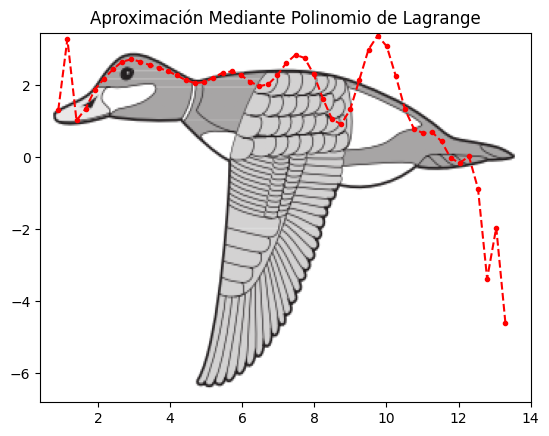

In [ ]:
# 3. Representar el polinomio de interpolación de Lagrange y de Hermite en estos puntos, para aproximar el dibujo
# 3.a) Lagrange
from scipy.interpolate import lagrange

pol_lagrange = lagrange(xp, yp)
x_inter = np.linspace(min(xp), max(xp))

plt.figure()
plt.plot(x_inter, pol_lagrange(x_inter), '.--r')
plt.imshow(imagen_pato, extent = (0.4, 14, -6.8, 3.45))

plt.title('Aproximación Mediante Polinomio de Lagrange')

Text(0.5, 1.0, 'Aproximación Mediante Hermite Spline')

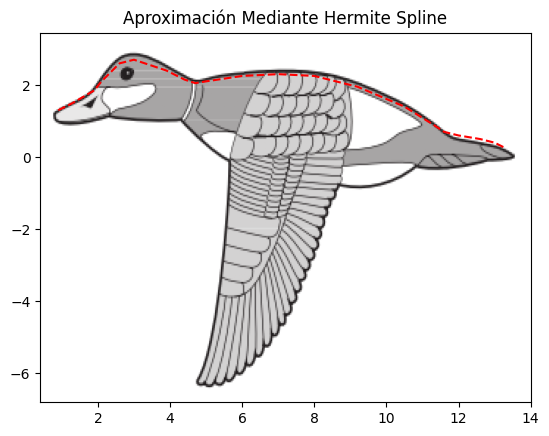

In [ ]:
# 3.b) Hermite
d_list = []
for i in range(len(xp)):
  if i == len(xp)-1:
    m = yp[i]/xp[i]
    d_list.append(m)
    break
  m = ((yp[i+1]) - yp[i])/(xp[i+1] - xp[i])
  d_list.append(m)

p = CubicHermiteSpline(xp,yp,d_list)

plt.plot(xp, p(xp), '--r')
plt.imshow(imagen_pato, extent = (0.4, 14, -6.8, 3.45))
plt.title('Aproximación Mediante Hermite Spline')

Note que se encuentra una estimación considerablemente más precisa aplicando el método de Hermite.

Text(0.5, 1.0, 'Aproximación Mediante CubicSpline')

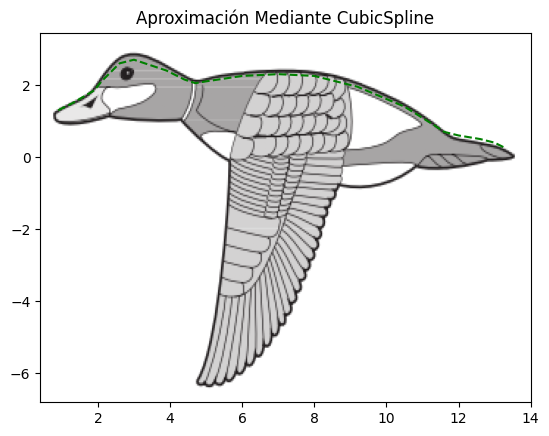

In [ ]:
# 4. Repetir el proceso de interpolación mediante splines cúbicos
from scipy.interpolate import CubicSpline
cubicspline = CubicSpline(xp, yp)

plt.plot(xp, cubicspline(xp), '--g')
plt.imshow(imagen_pato, extent = (0.4, 14, -6.8, 3.45))
plt.title('Aproximación Mediante CubicSpline')

<Figure size 640x480 with 0 Axes>

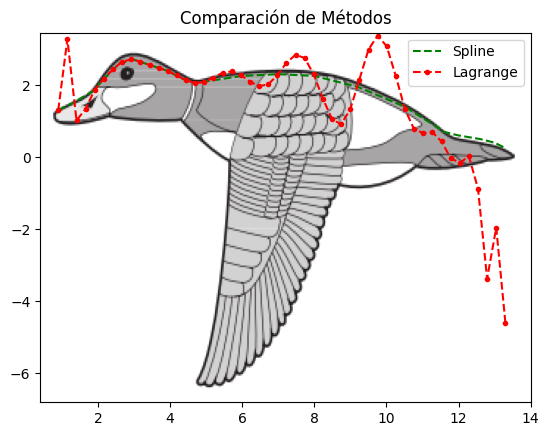

<Figure size 640x480 with 0 Axes>

In [ ]:
# 5. Comparar los resultados. ¿Alguna de las interpolaciones presenta oscilaciones? ¿A qué se debe este fenómeno?

plt.plot(xp, cubicspline(xp), '--g', label = 'Spline')
plt.imshow(imagen_pato, extent = (0.4, 14, -6.8, 3.45))
plt.plot(x_inter, pol_lagrange(x_inter), '.--r', label = 'Lagrange')
plt.title('Comparación de Métodos')
plt.legend()
plt.figure()

El método de Cubic Spline arrojó exactamente los mismos resultados que el de Cubic Hermite Spline, pues ambos usan ecuaciones spline del mismo grado. Por otro lado, los polinomios de Lagrange tienen un grado mayor, lo que se traduce en mayores oscilaciones entre los puntos.
Por eso, en este caso, es más conveniente emplear métodos de Spline.
Además, el método de Hermite que emplea diferenciación, se acerca por los límites de los puntos, volviéndolo más preciso.